measured is blue
simulated is red


/home/farag/open_design_environment/tools/anaconda-3-2022.05/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


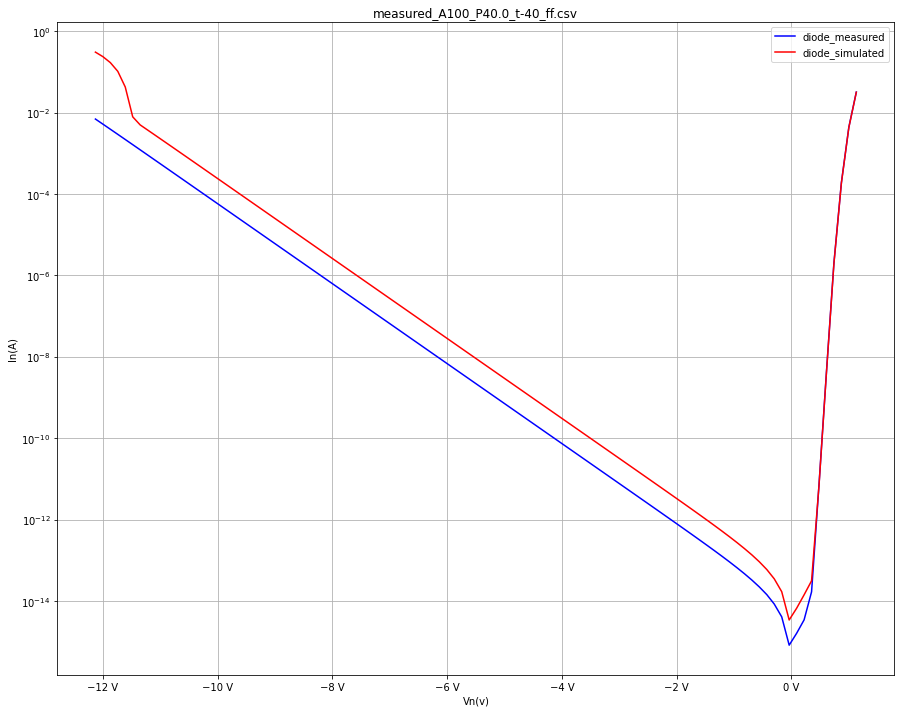

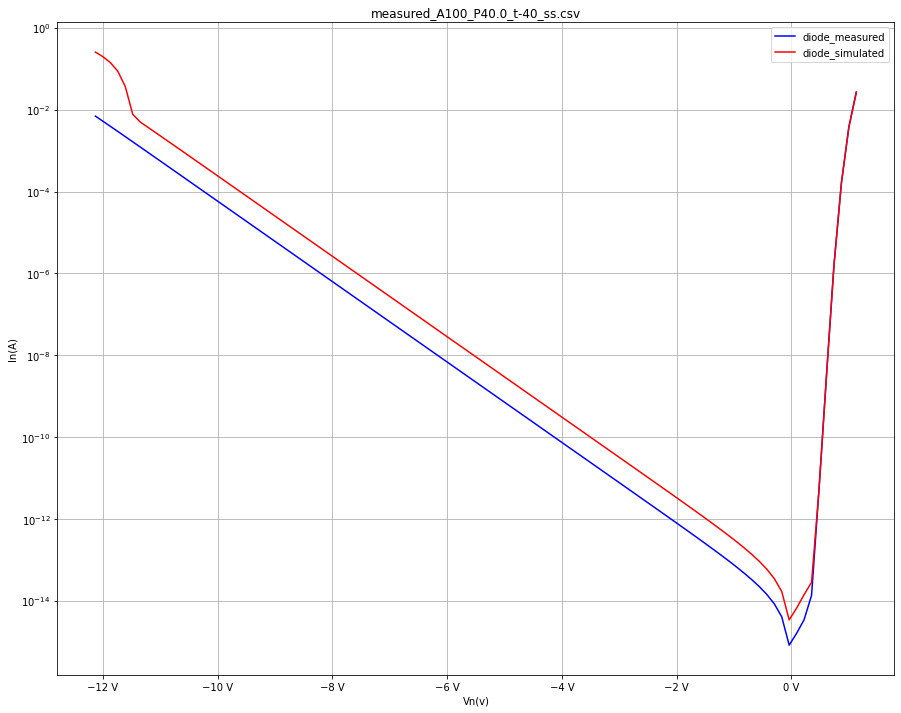

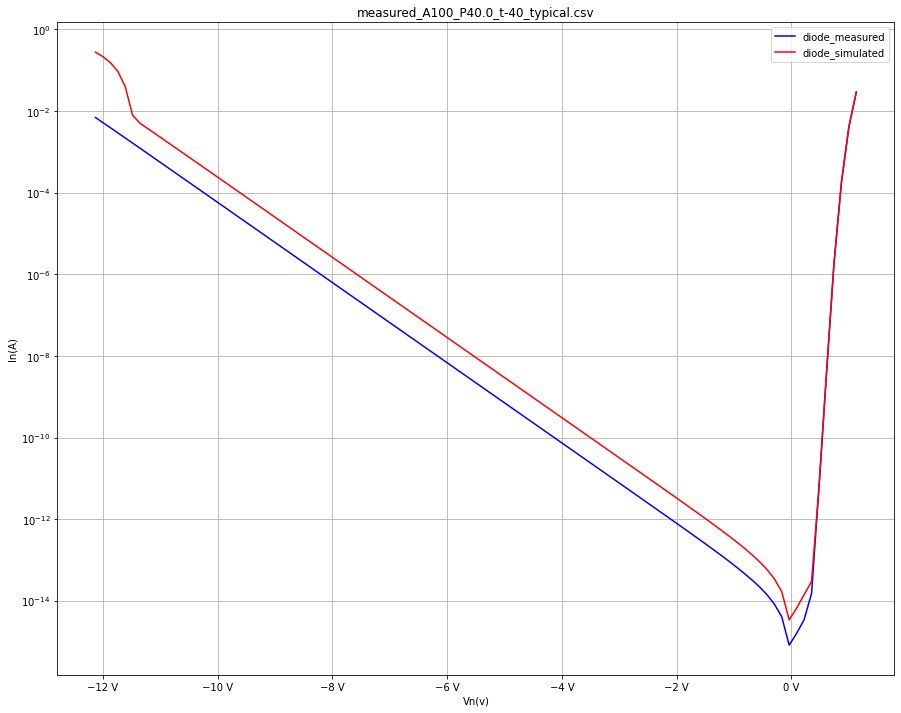

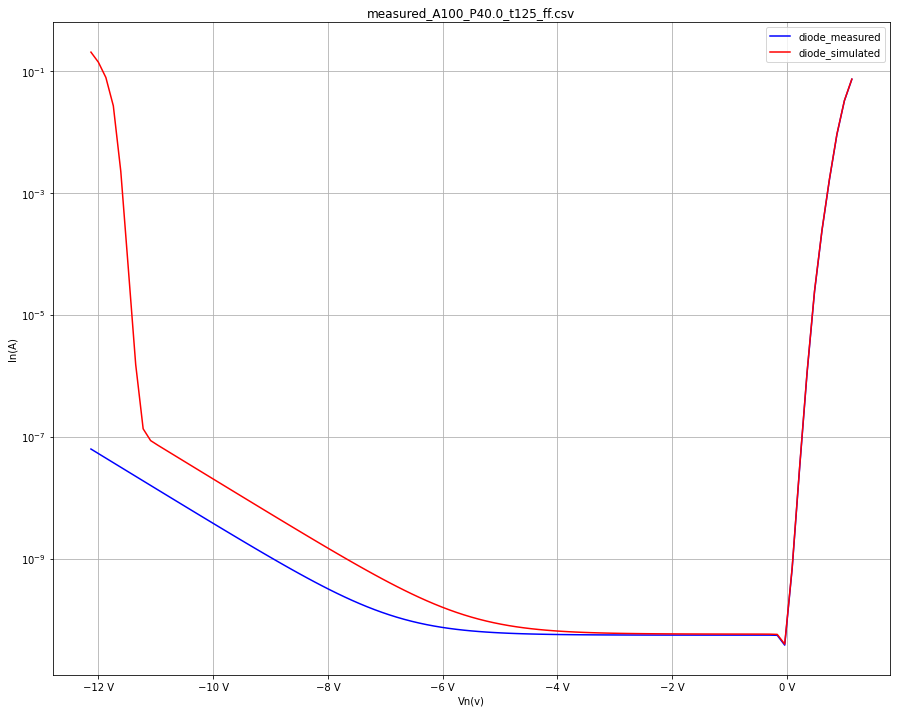

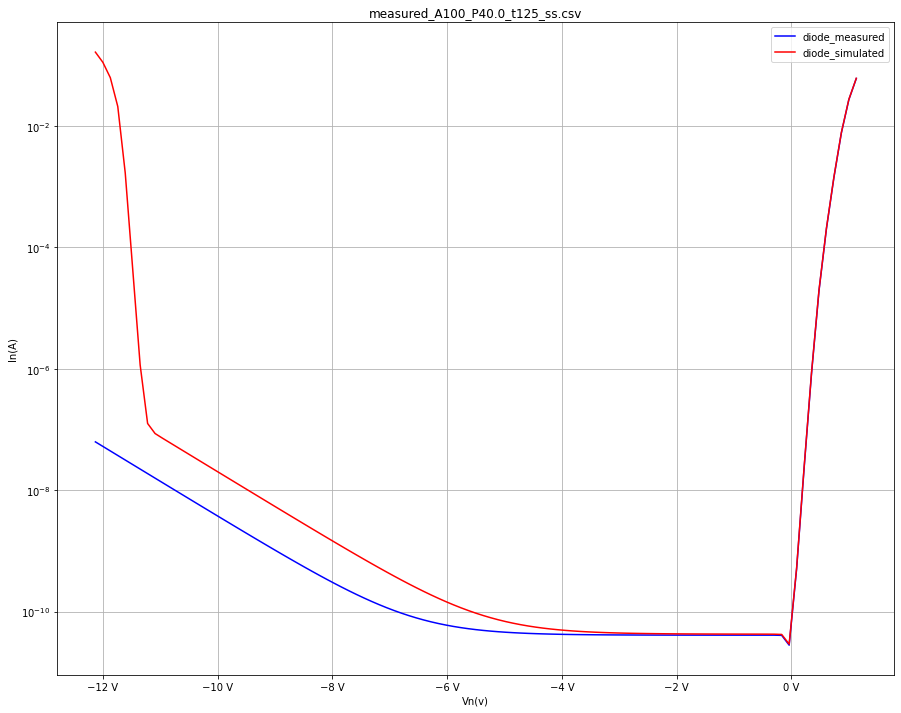

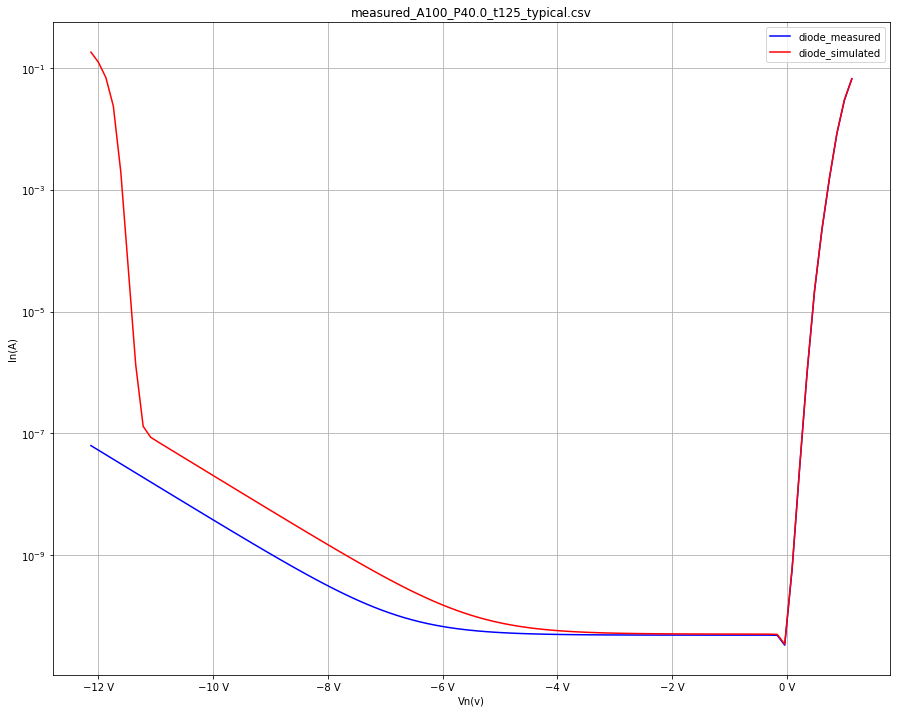

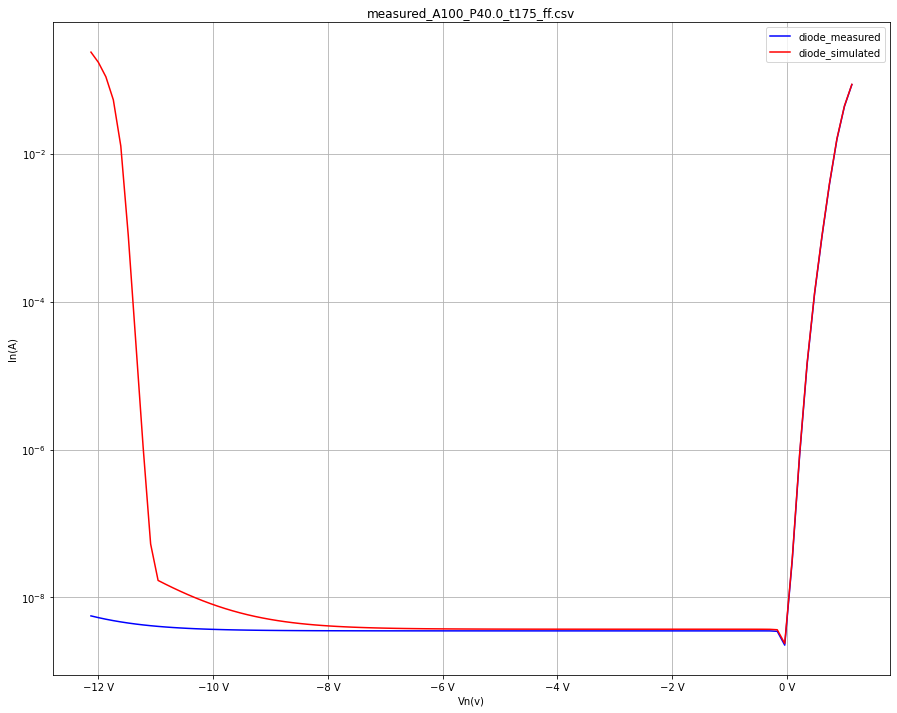

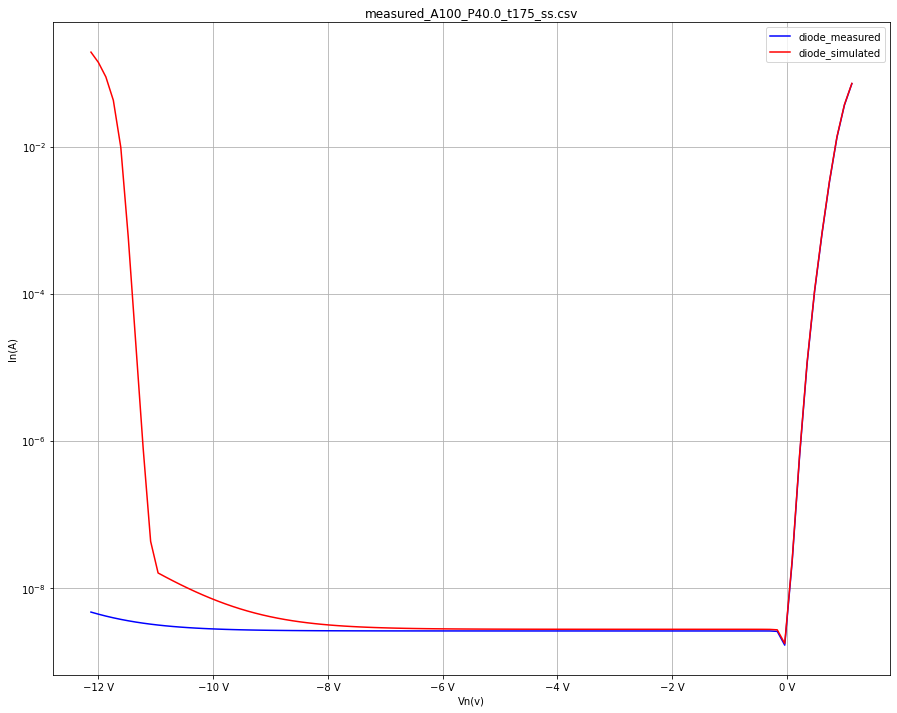

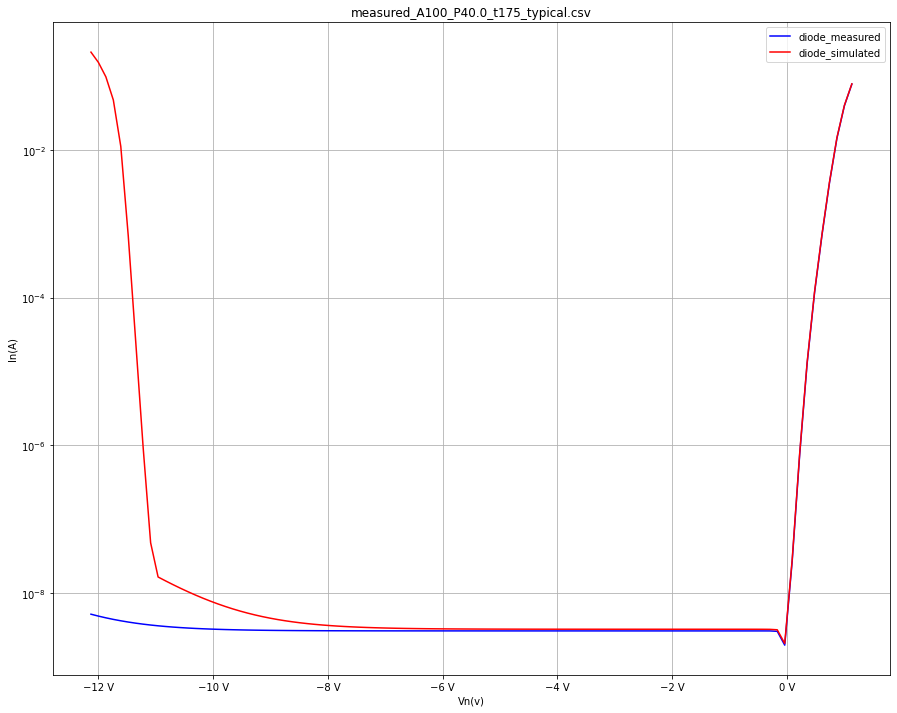

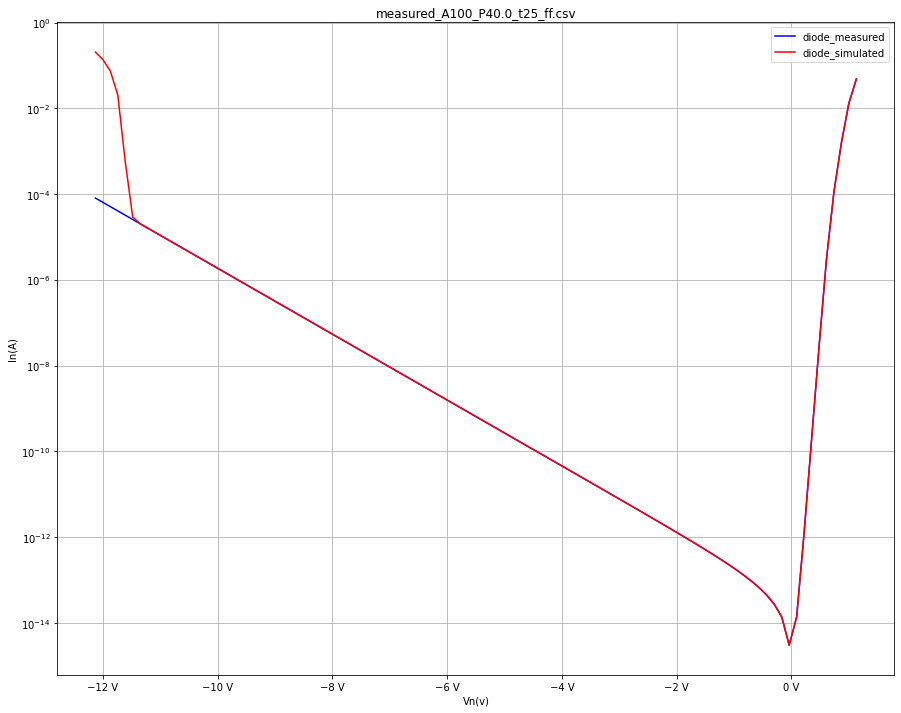

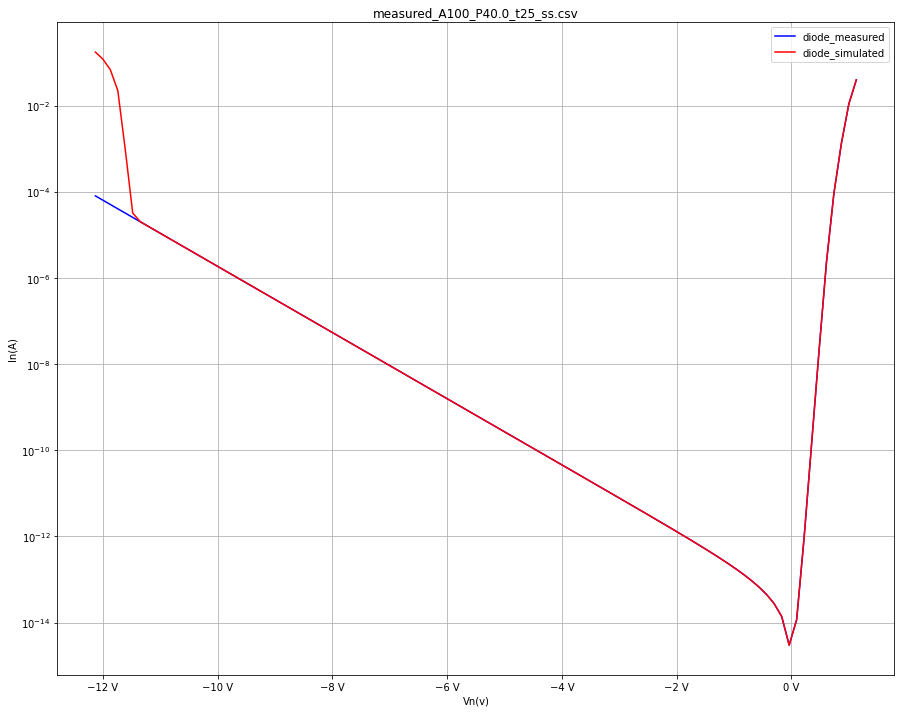

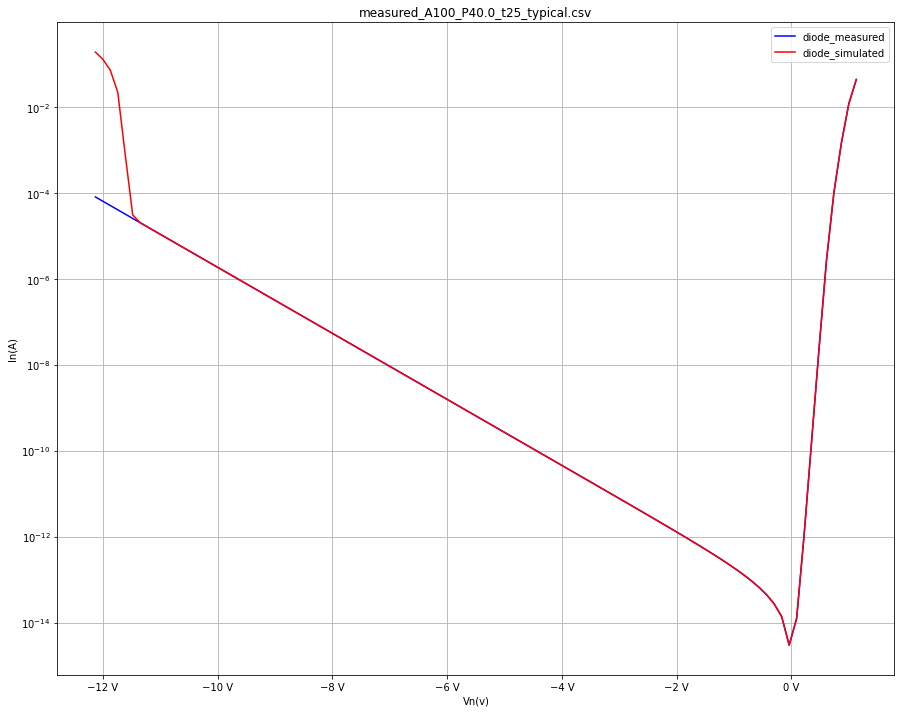

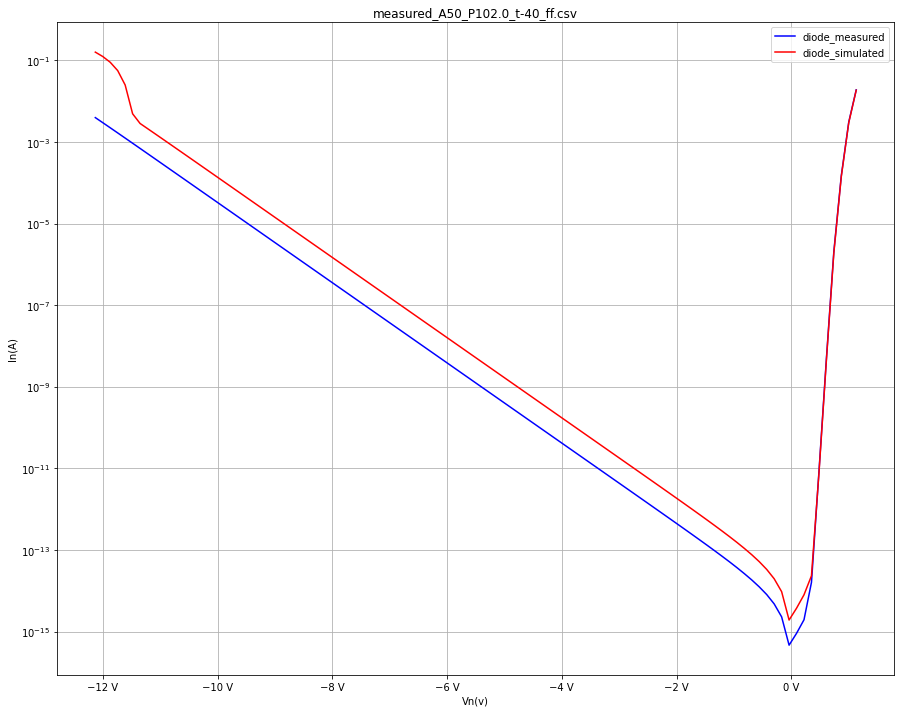

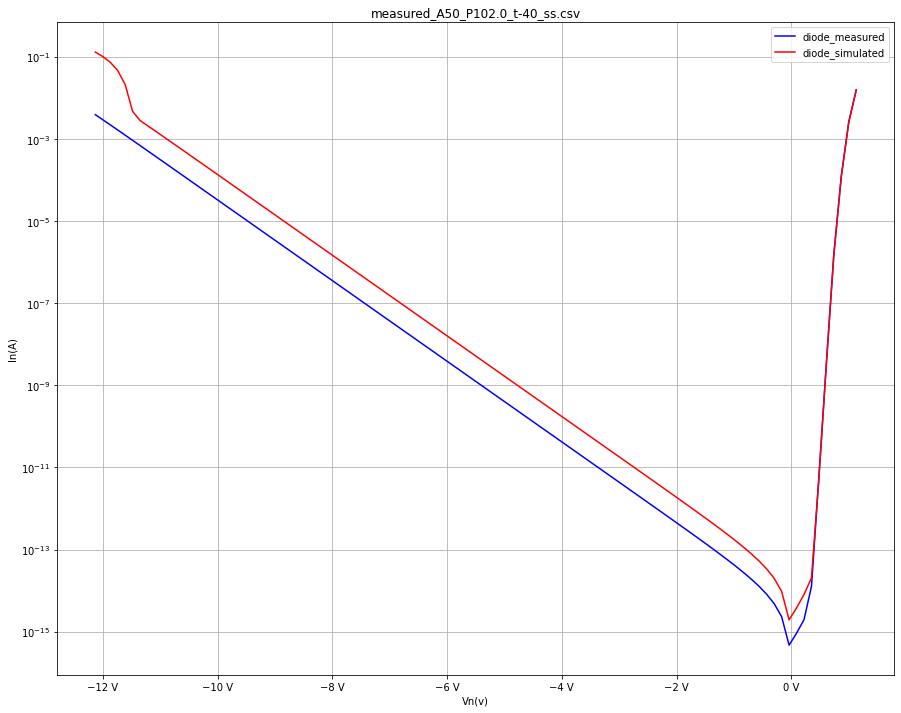

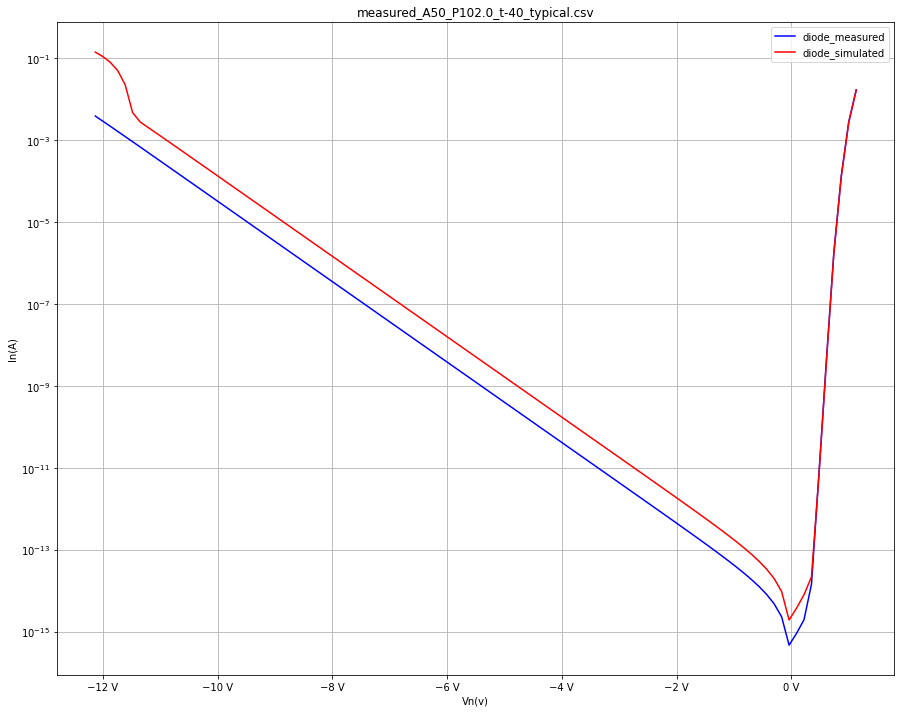

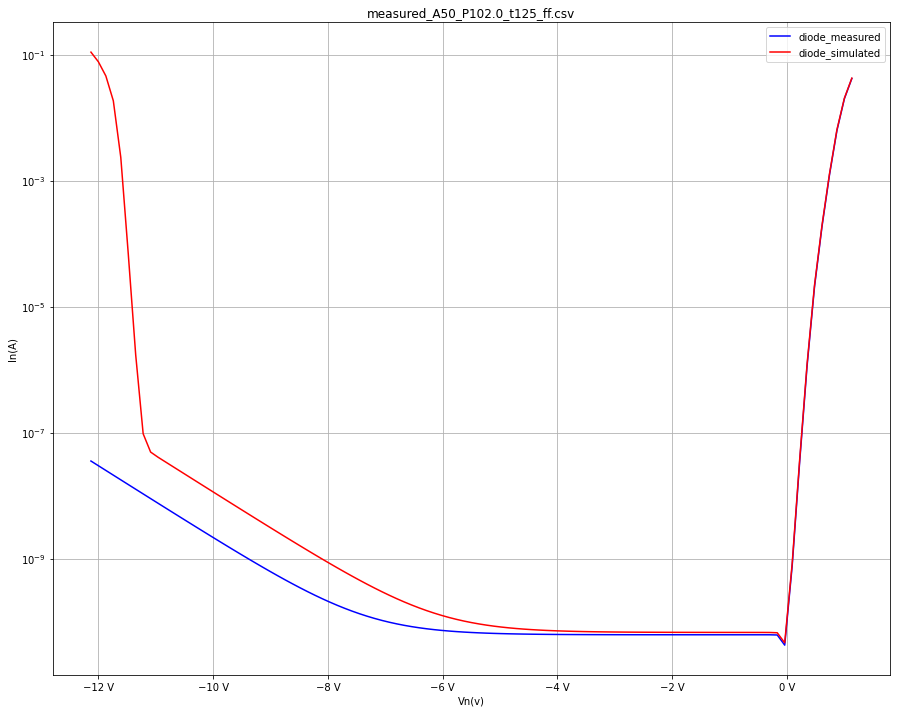

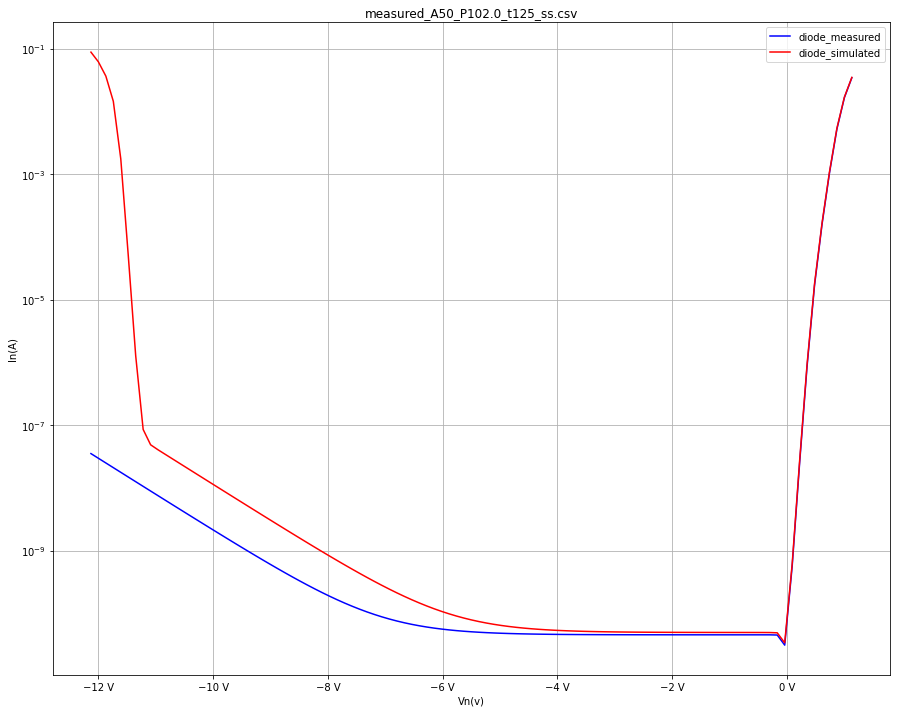

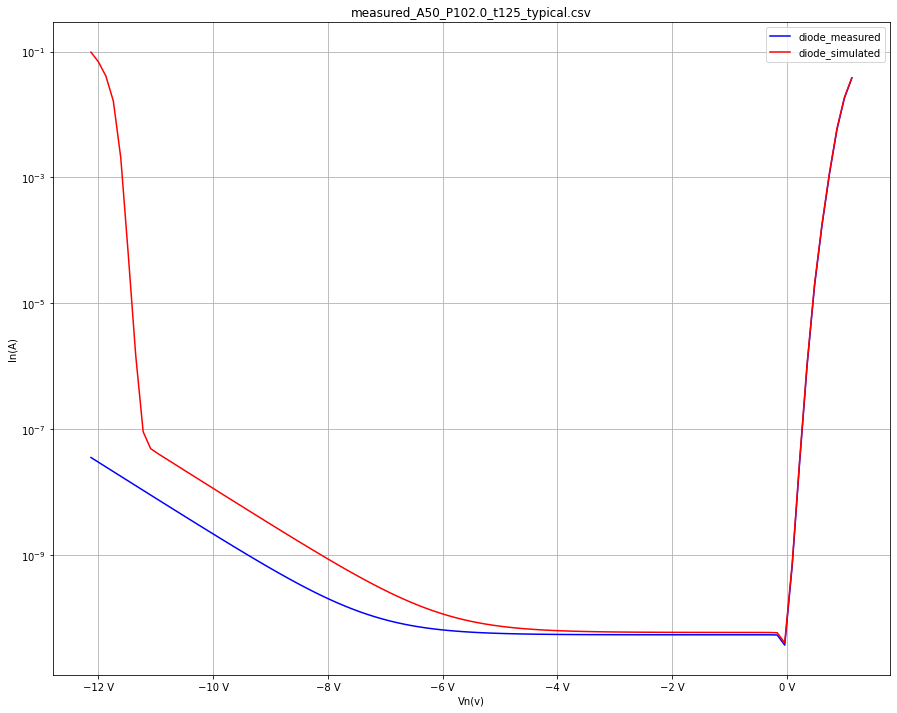

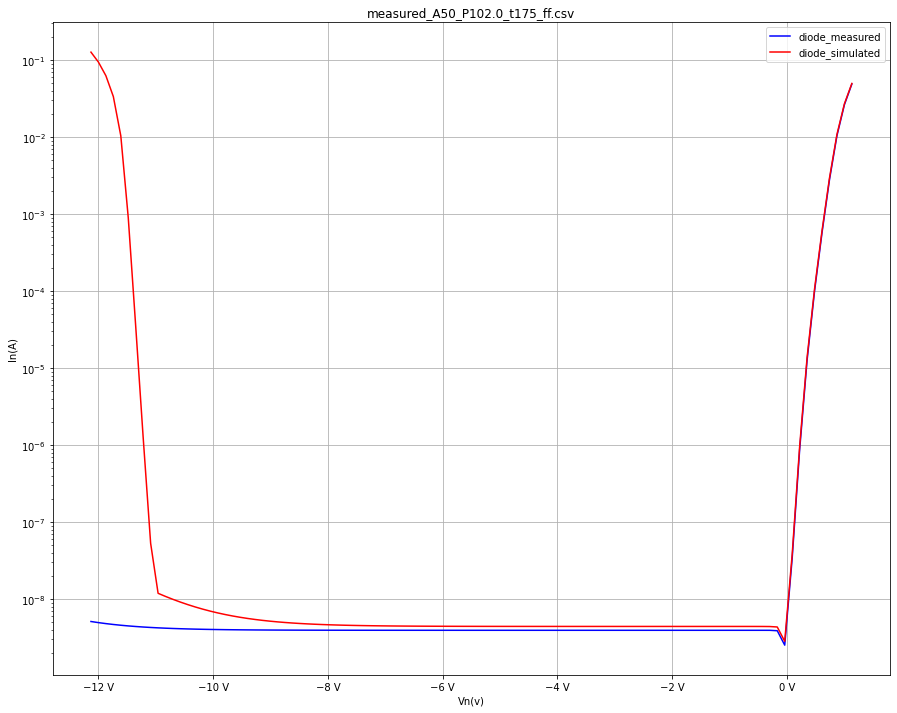

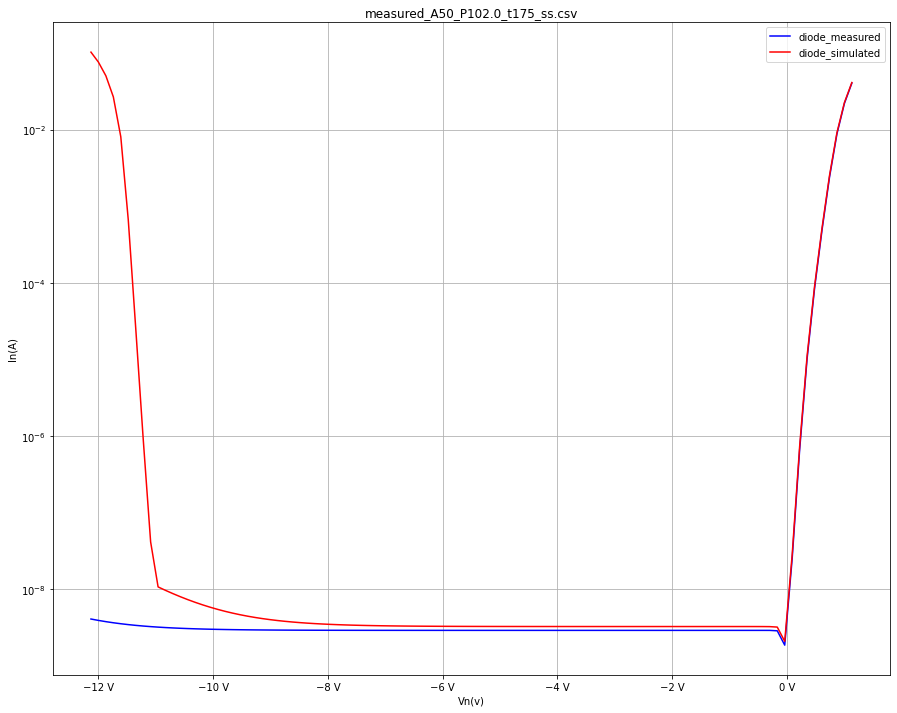

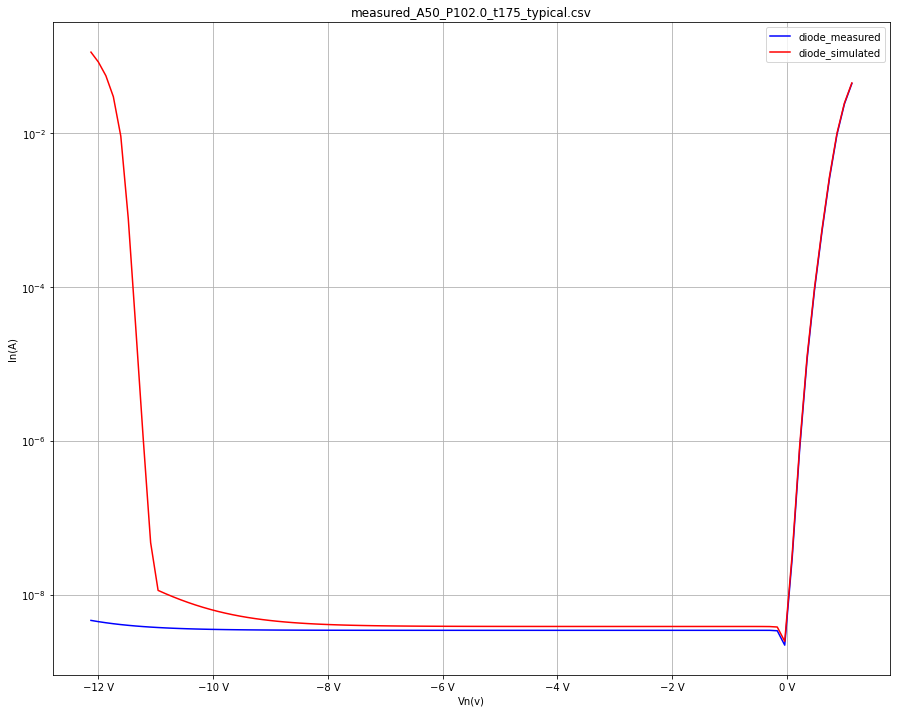

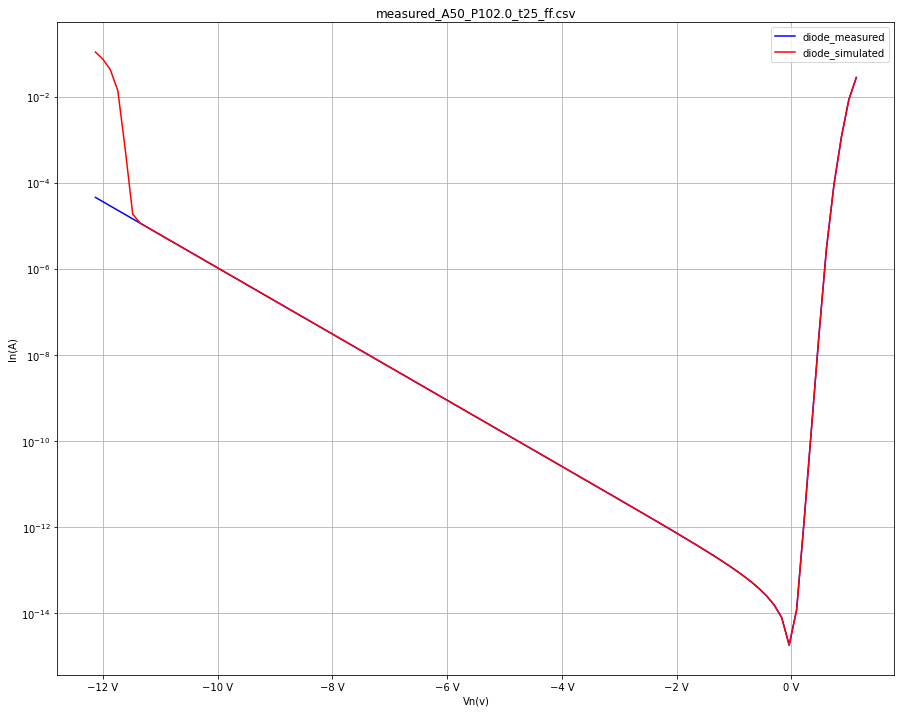

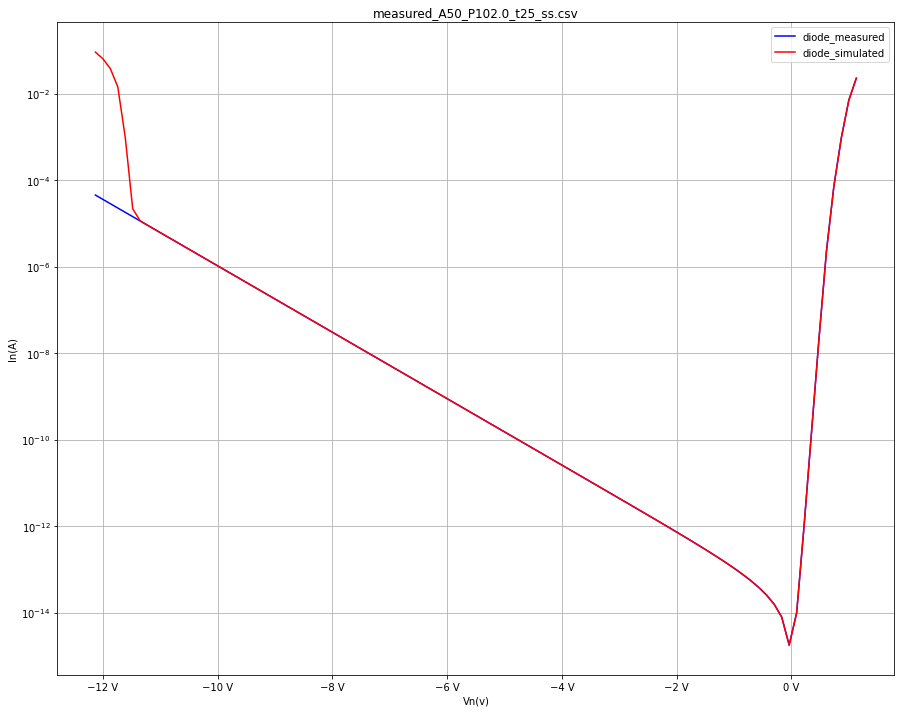

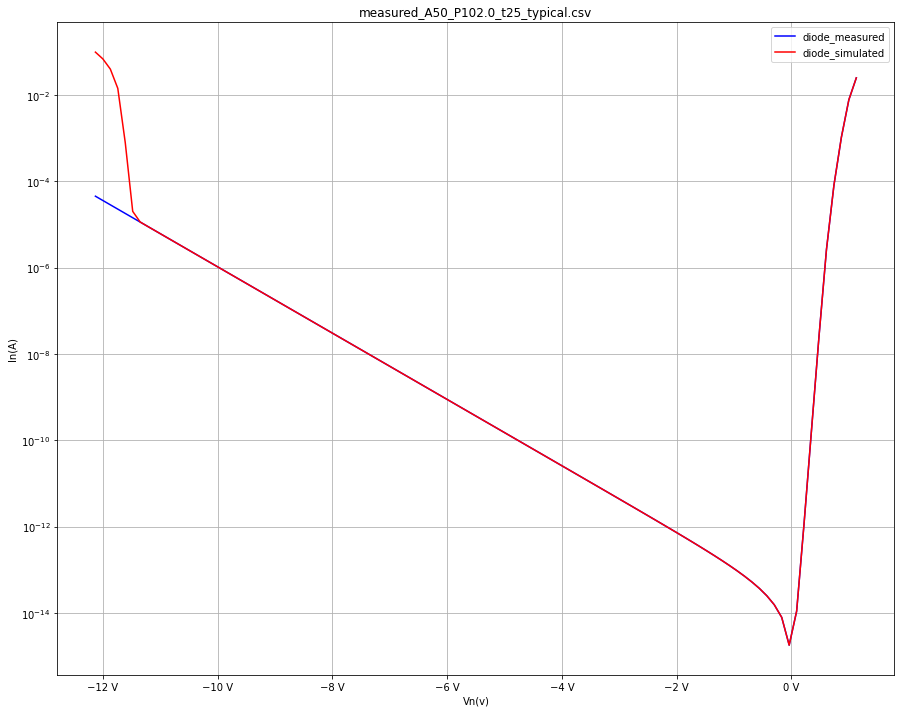

In [1]:
import os
import pandas as pd
import glob
from matplotlib import pyplot as plt
from matplotlib.ticker import EngFormatter


def draw(measured: list[str], simulated: list[str]) -> None:
    """draw func draw measured data vs simulated data

    Args:
        measured (list[str]): measured files paths
        simulated (list[str]): simulated files paths
    """
    print("measured is blue")
    print("simulated is red")
    measured.sort()
    simulated.sort()
    for i in range(len(measured)):
        space = measured[i].rfind("/")
        read_dev_name = measured[i][space + 1:]
        df = pd.read_csv(measured[i])
        ax = df.plot(x=df.columns[0], y=df.columns[1:], color="b", figsize=(15,12))
        volt_formatter = EngFormatter(unit='V')
        amp_formatter = EngFormatter(unit='A')
        ax.xaxis.set_major_formatter(volt_formatter)
        ax.yaxis.set_major_formatter(amp_formatter)
        df = pd.read_csv(simulated[i])
        df.plot(ax=ax, x=df.columns[0], y=df.columns[1:], color="r")
        plt.title(read_dev_name)
        plt.grid()
        plt.xlabel('Vn(v)')
        plt.ylabel('In(A)')
        ax.set_yscale('log')
    plt.show()



device = [
    "diode_regr/diode_dw2ps",
    "diode_regr/diode_nd2ps_03v3",
    "diode_regr/diode_nd2ps_06v0",
    "diode_regr/diode_nw2ps_03v3",
    "diode_regr/diode_nw2ps_06v0",
    "diode_regr/diode_pd2nw_03v3",
    "diode_regr/diode_pd2nw_06v0",
    "diode_regr/diode_pw2dw",
    "diode_regr/sc_diode",
]

# 0 for diode_dw2ps
# 1 for diode_nd2ps_03v3
# 2 for diode_nd2ps_06v0
# 3 for diode_nw2ps_03v3
# 4 for diode_nw2ps_06v0
# 5 for diode_pd2nw_03v3
# 6 for diode_pd2nw_06v0
# 7 for diode_pw2dw
# 8 for sc_diode
dev = 0

measured = glob.glob(f"{device[dev]}/measured_iv/*.csv")
simulated = glob.glob(f"{device[dev]}/*_netlists_iv/*.csv")
measured.sort()
simulated.sort()
# caling the draw func
draw(measured, simulated)

In [2]:
import os
import pandas as pd
import glob
from matplotlib import pyplot as plt
from matplotlib.ticker import EngFormatter


def draw(measured: list[str], simulated: list[str]) -> None:
    """draw func draw measured data vs simulated data

    Args:
        measured (list[str]): measured files paths
        simulated (list[str]): simulated files paths
    """
    print("measured is blue")
    print("simulated is red")
    measured.sort()
    simulated.sort()
    for i in range(len(measured)):
        space = measured[i].rfind("/")
        read_dev_name = measured[i][space + 1:]
        df = pd.read_csv(measured[i])
        ax = df.plot(x=df.columns[0], y=df.columns[1:], color="b", figsize=(15,12))
        volt_formatter = EngFormatter(unit='V')
        amp_formatter = EngFormatter(unit='fF')
        ax.xaxis.set_major_formatter(volt_formatter)
        ax.yaxis.set_major_formatter(amp_formatter)
        df = pd.read_csv(simulated[i])
        df.plot(ax=ax, x=df.columns[0], y=df.columns[1:], color="r")
        plt.title(read_dev_name)
        plt.grid()
        plt.xlabel('Vj(v)')
        plt.ylabel('Cj(fF)')
        plt.show()



device = [
    "diode_regr/diode_dw2ps",
    "diode_regr/diode_nd2ps_03v3",
    "diode_regr/diode_nd2ps_06v0",
    "diode_regr/diode_nw2ps_03v3",
    "diode_regr/diode_nw2ps_06v0",
    "diode_regr/diode_pd2nw_03v3",
    "diode_regr/diode_pd2nw_06v0",
    "diode_regr/diode_pw2dw",
    "diode_regr/sc_diode",
]

# 0 for diode_dw2ps
# 1 for diode_nd2ps_03v3
# 2 for diode_nd2ps_06v0
# 3 for diode_nw2ps_03v3
# 4 for diode_nw2ps_06v0
# 5 for diode_pd2nw_03v3
# 6 for diode_pd2nw_06v0
# 7 for diode_pw2dw
# 8 for sc_diode
dev = 8

measured = glob.glob(f"{device[dev]}/measured_cv/*.csv")
simulated = glob.glob(f"{device[dev]}/*_netlists_cv/*.csv")
measured.sort()
simulated.sort()
# caling the draw func
draw(measured, simulated)

measured is blue
simulated is red
